In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
df_test = pd.read_csv("/content/drive/MyDrive/SML_team9_test.csv")
df_train = pd.read_csv("/content/drive/MyDrive/SML_team9_train.csv")


Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train = df_train.drop(columns=["Attrition"])
y_train = df_train["Attrition"]
X_test = df_test.drop(columns=["Attrition"])
y_test = df_test["Attrition"]

# Label Encoding for all categorical variables
label_encoders = {}
for col in X_train.columns:
    if X_train[col].dtype == "object":
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])  # use same encoder for test
        label_encoders[col] = le

In [ ]:
for col, le in label_encoders.items():
    print(f"[{col}] Label Encoding Mapping:")
    for i, class_name in enumerate(le.classes_):
        print(f"  {class_name} → {i}")
    print()

[Gender] Label Encoding Mapping:
  Female → 0
  Male → 1

[Job Role] Label Encoding Mapping:
  Education → 0
  Finance → 1
  Healthcare → 2
  Media → 3
  Technology → 4

[Work-Life Balance] Label Encoding Mapping:
  Excellent → 0
  Fair → 1
  Good → 2
  Poor → 3

[Job Satisfaction] Label Encoding Mapping:
  High → 0
  Low → 1
  Medium → 2
  Very High → 3

[Performance Rating] Label Encoding Mapping:
  Average → 0
  Below Average → 1
  High → 2
  Low → 3

[Overtime] Label Encoding Mapping:
  No → 0
  Yes → 1

[Education Level] Label Encoding Mapping:
  Associate Degree → 0
  Bachelor’s Degree → 1
  High School → 2
  Master’s Degree → 3
  PhD → 4

[Marital Status] Label Encoding Mapping:
  Divorced → 0
  Married → 1
  Single → 2

[Job Level] Label Encoding Mapping:
  Entry → 0
  Mid → 1
  Senior → 2

[Company Size] Label Encoding Mapping:
  Large → 0
  Medium → 1
  Small → 2

[Remote Work] Label Encoding Mapping:
  No → 0
  Yes → 1

[Leadership Opportunities] Label Encoding Mapping:
  No

<ipython-input-3-a16d83fbe535>:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_test.hist(ax=axes[0], bins=20, edgecolor='black')


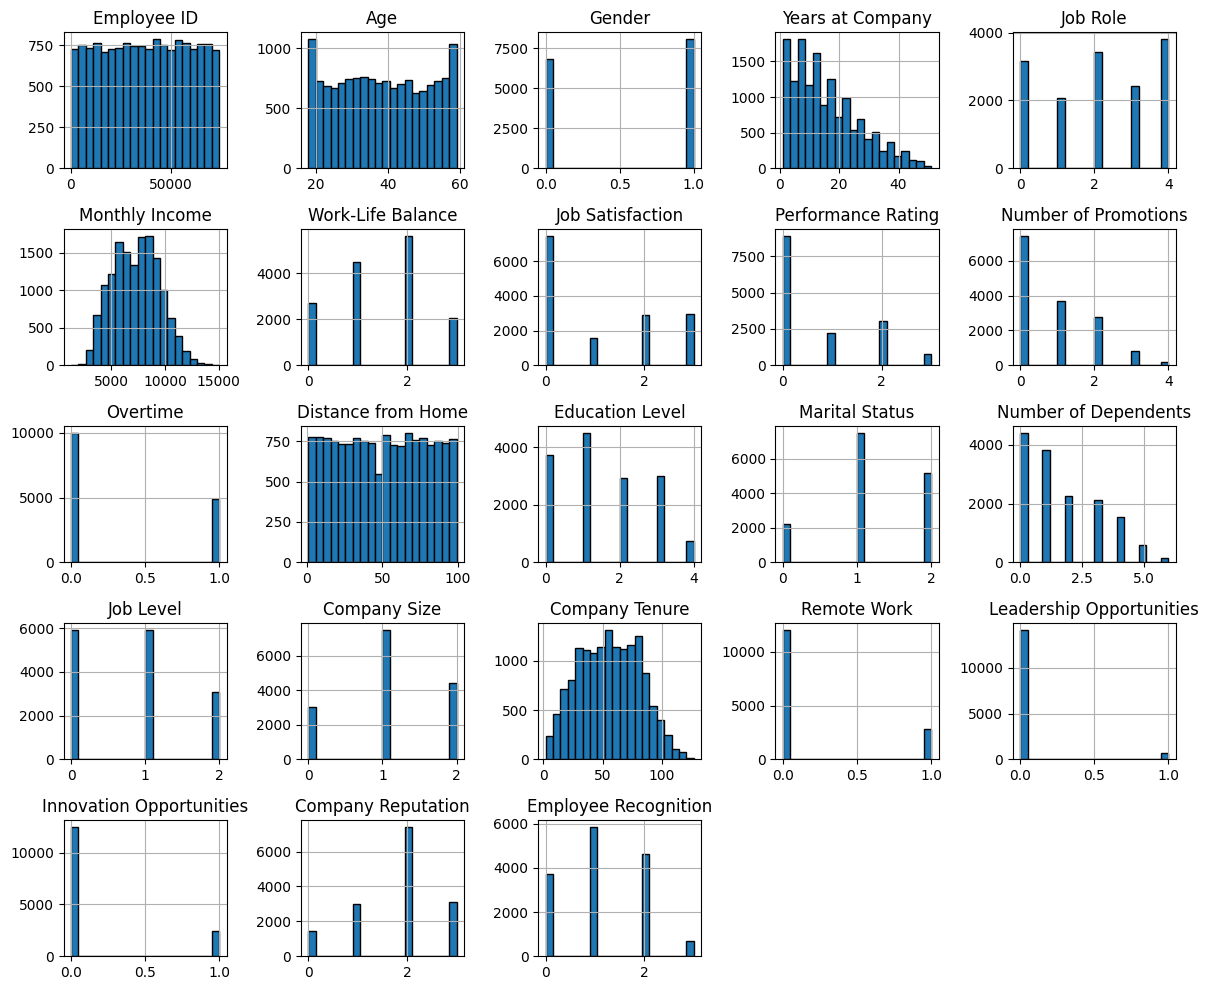

In [ ]:
# Encode the target variable
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train)
y_test = target_encoder.transform(y_test)

# Plot histograms for both train and test datasets
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

X_test.hist(ax=axes[0], bins=20, edgecolor='black')
axes[0].set_title("Test Data Histogram")

plt.tight_layout()
plt.show()


<ipython-input-4-e78ad4efcd9c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.hist(ax=axes[1], bins=20, edgecolor='black')


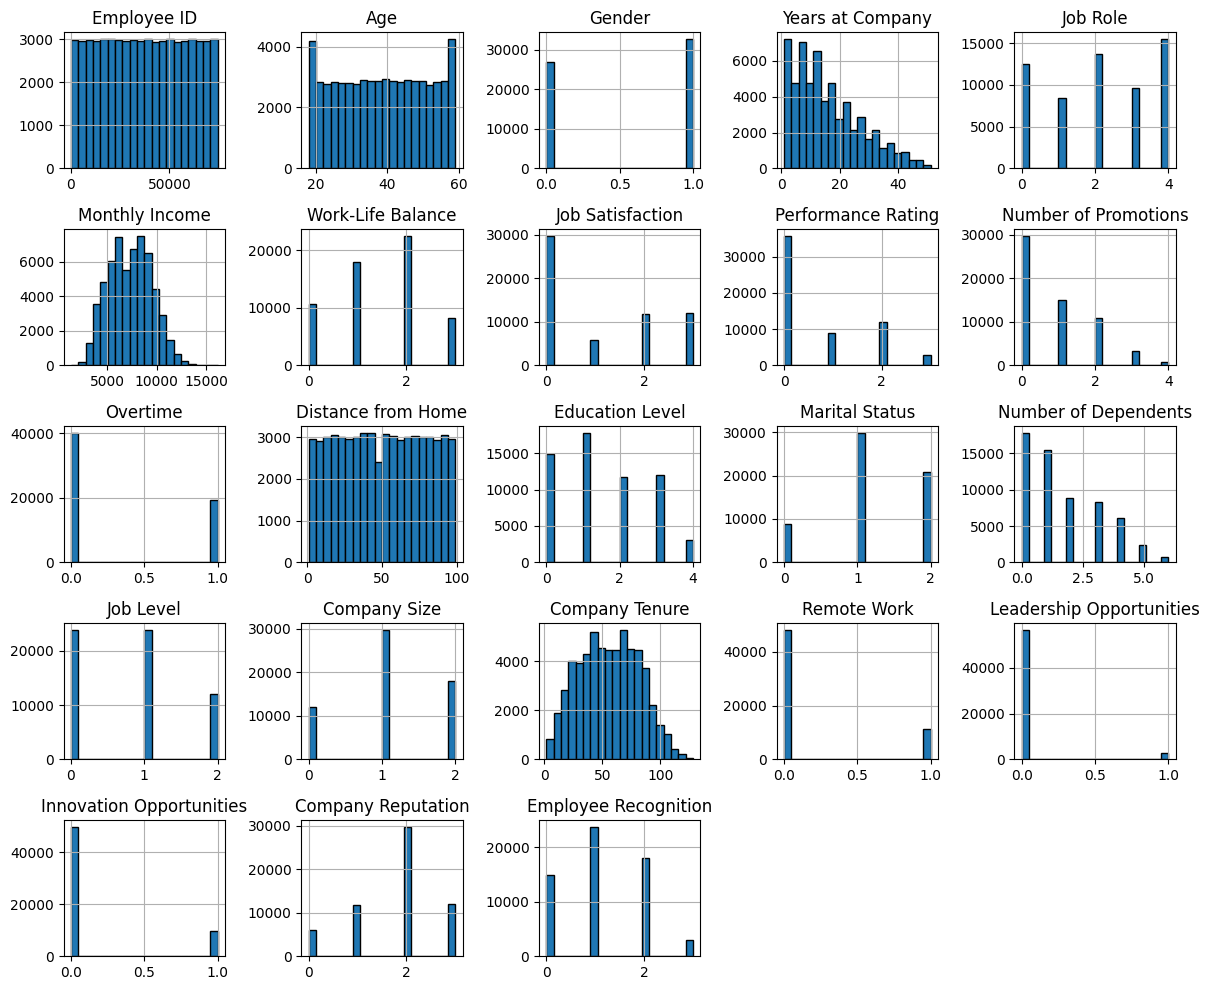

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

X_train.hist(ax=axes[1], bins=20, edgecolor='black')
axes[1].set_title("Train Data Histogram")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 정확한 클래스명이 숫자인 경우, 문자열로 직접 지정
report = classification_report(
    y_test,
    y_pred,
    target_names=["Left", "Stayed"]  # 혹은 ['Stayed', 'Left'] → 라벨 순서에 따라 바꿔야 함
)
print(report)

              precision    recall  f1-score   support

        Left       0.70      0.70      0.70      7032
      Stayed       0.73      0.73      0.73      7868

    accuracy                           0.71     14900
   macro avg       0.71      0.71      0.71     14900
weighted avg       0.71      0.71      0.71     14900



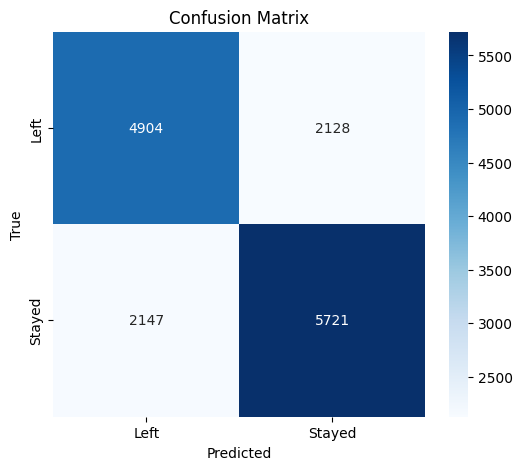

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred)
# 라벨 순서를 정확히 지정
labels = ["Left", "Stayed"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

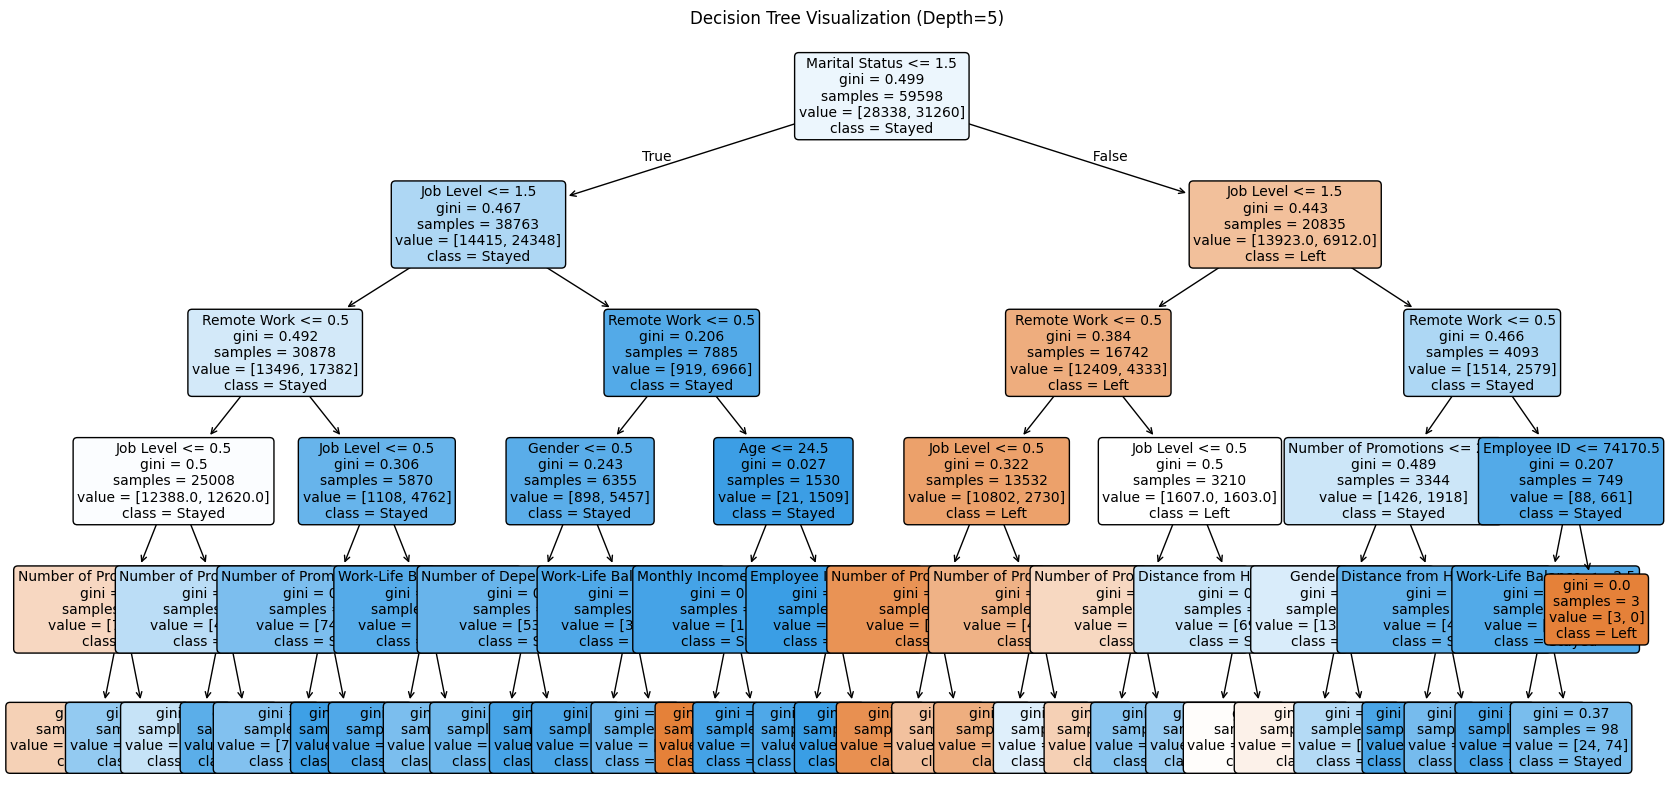

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=X_train.columns,
    class_names=["Left", "Stayed"],  # 여기를 문자열 리스트로 명시
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (Depth=5)")
plt.show()

In [ ]:
# Re-import necessary packages after code execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X_train = df_train.drop(columns=["Attrition"])
y_train = df_train["Attrition"]
X_test = df_test.drop(columns=["Attrition"])
y_test = df_test["Attrition"]

# Encode categorical features
label_encoders = {}
for col in X_train.columns:
    if X_train[col].dtype == "object":
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        label_encoders[col] = le

# Encode target
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train)
y_test = target_encoder.transform(y_test)

# Manually selected alpha values
alpha_values = [0.0, 0.001, 0.005, 0.01, 0.02]
clfs = []

# Train model for each alpha
for alpha in alpha_values:
    clf_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf_alpha.fit(X_train, y_train)
    clfs.append(clf_alpha)

# Collect performance metrics
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
num_leaves = [clf.get_n_leaves() for clf in clfs]

# Create result DataFrame
result_df = pd.DataFrame({
    'alpha': alpha_values,
    'train_accuracy': train_scores,
    'test_accuracy': test_scores,
    'num_leaves': num_leaves
})

result_df

,alpha,train_accuracy,test_accuracy,num_leaves
0,0.000,1.000000,0.667987,10465
1,0.001,0.718682,0.716107,18
2,0.005,0.699352,0.701141,7
3,0.010,0.660022,0.659463,5
4,0.020,0.642152,0.643221,3


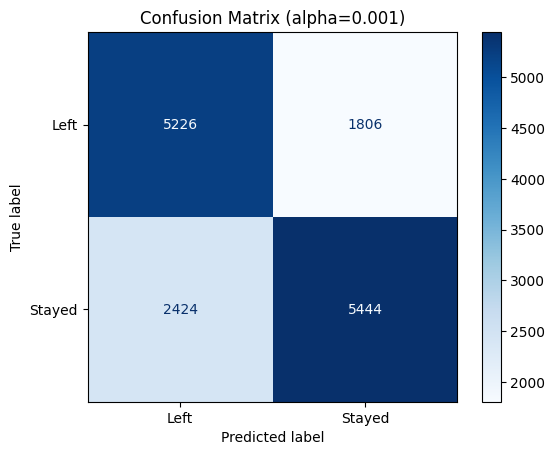

In [ ]:
clf_001 = clfs[1]
y_pred_001 = clf_001.predict(X_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 혼동행렬 계산
cm = confusion_matrix(y_test, y_pred_001)

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (alpha=0.001)")
plt.show()

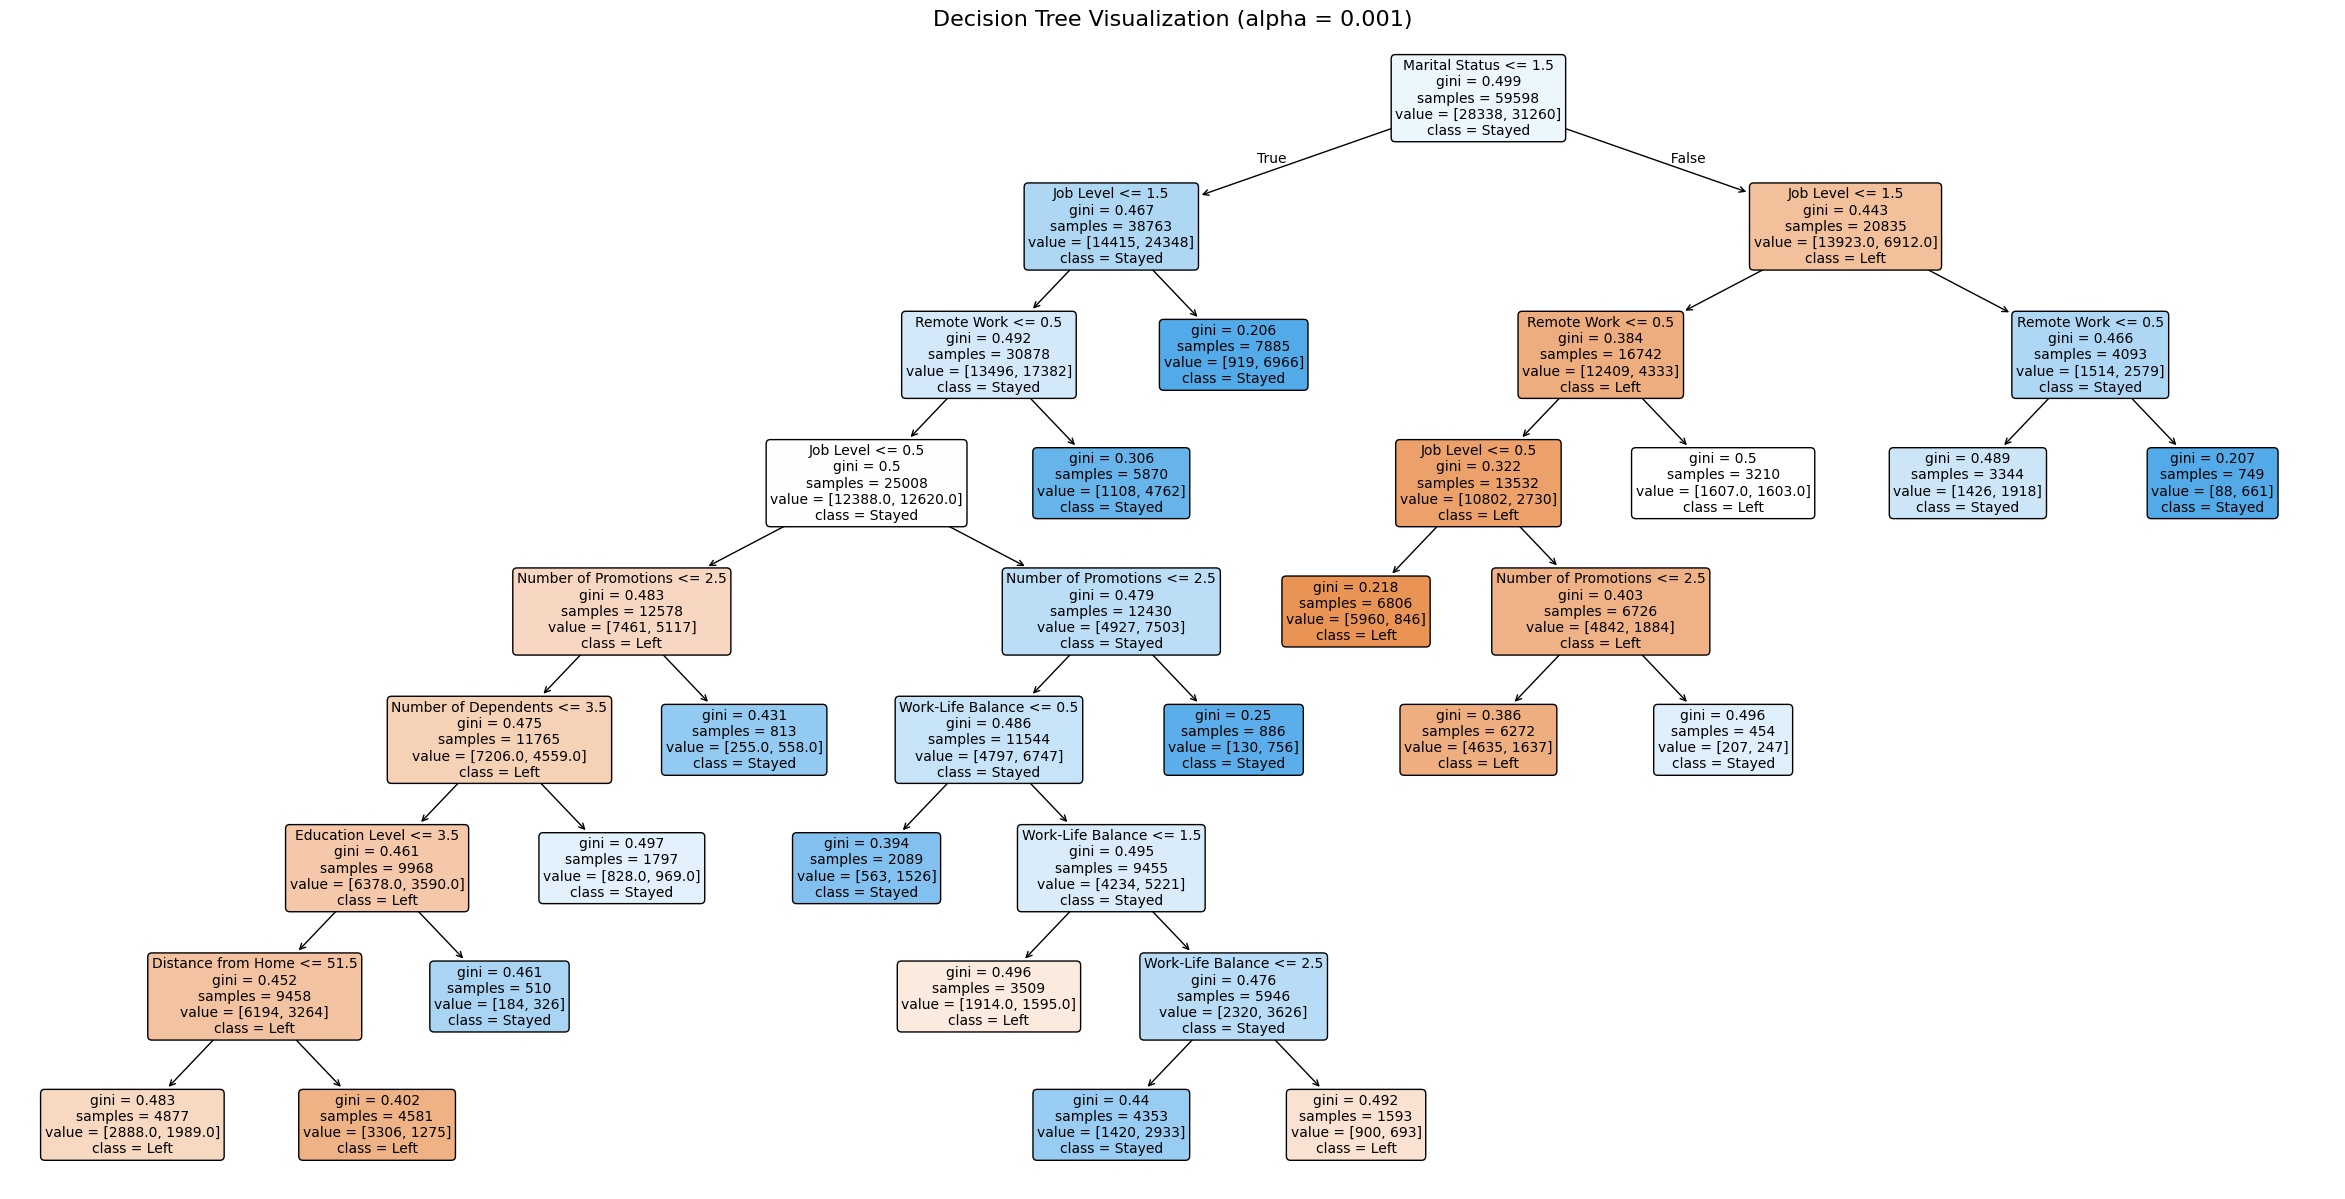

In [ ]:
# alpha = 0.001인 모델 선택
best_alpha_index = alpha_values.index(0.001)
best_model = clfs[best_alpha_index]

# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 15))
plot_tree(
    best_model,
    feature_names=X_train.columns,
    class_names=target_encoder.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (alpha = 0.001)", fontsize=16)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# alpha = 0.005일 때의 모델과 예측값
best_alpha_index = alpha_values.index(0.005)
best_model = clfs[best_alpha_index]
y_pred = best_model.predict(X_test)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_encoder.classes_)

{
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
}

{'Accuracy': 0.7011409395973154,
 'Precision': 0.7220127421661683,
 'Recall': 0.7057702084392475,
 'F1 Score': 0.713799087344945}

In [ ]:
print(report)

              precision    recall  f1-score   support

        Left       0.68      0.70      0.69      7032
      Stayed       0.72      0.71      0.71      7868

    accuracy                           0.70     14900
   macro avg       0.70      0.70      0.70     14900
weighted avg       0.70      0.70      0.70     14900

